# Mapas interactivos con Folium

Folium nos permite trabajar con mapas y realizar visualizaciones de localizaciones, trayectos, etc. cuando trabajemos con información geolocalizada.

Ficheros que usaremos en los ejemplos:

* indiana_outline_map.geojson
* sales_region1.geojson
* sales_region2.geojson
* sales_region3.geojson
* geojson_indianacounties.geojson
* indiana_population_by_county.csv
* flags_of_africa.png (from Wikipedia)

# Documentación

In [1]:
from IPython.display import IFrame
documentation = IFrame(src='https://python-visualization.github.io/folium/', width=1000, height=500)
display(documentation)

In [3]:
# !pip install folium geocoder vega_datasets

# Imports

In [4]:
import folium # pip install folium
from folium import plugins
# import ipywidgets # pip install ipywidgets
import geocoder # pip install geocoder
# import geopy # pip install geopy
import numpy as np
import pandas as pd
from vega_datasets import data as vds # pip install vega_datasets

# Mapas básicos

Folium utiliza mapas de servicios terceros (OpenStreetMaps, CartoDB,...) identificados por el nombre del mismo cuando vayamos a crear nuestras visualizaciones.

In [5]:
help(folium.Map)

Help on class Map in module folium.folium:

class Map(folium.elements.JSCSSMixin, branca.element.MacroElement)
 |  Map(location: Optional[Sequence[float]] = None, width: Union[str, float] = '100%', height: Union[str, float] = '100%', left: Union[str, float] = '0%', top: Union[str, float] = '0%', position: str = 'relative', tiles: Union[str, folium.raster_layers.TileLayer, NoneType] = 'OpenStreetMap', attr: Optional[str] = None, min_zoom: int = 0, max_zoom: int = 18, zoom_start: int = 10, min_lat: int = -90, max_lat: int = 90, min_lon: int = -180, max_lon: int = 180, max_bounds: bool = False, crs: str = 'EPSG3857', control_scale: bool = False, prefer_canvas: bool = False, no_touch: bool = False, disable_3d: bool = False, png_enabled: bool = False, zoom_control: bool = True, font_size: str = '1rem', **kwargs: Union[str, float, bool, Sequence, dict, NoneType])
 |  
 |  Create a Map with Folium and Leaflet.js
 |  
 |  Generate a base map of given width and height with either default
 |  ti

In [6]:
folium.Map()

In [7]:
map1 = folium.Map(location=[40.4567, -3.6840],
                 zoom_start=14,
                #  width=700,
                #  height=500,
                 control_scale=True)
map1

# Guardar nuestro mapa

In [8]:
map1.save('map1.html')

# Tipos de mapas

In [12]:
# show map types using layer control
# Layers: https://deparkes.co.uk/2016/06/10/folium-map-tiles/

# map
map_layer_control = folium.Map(location=[40.416719, -3.684016], zoom_start=12)

# add tiles to map
folium.TileLayer('Open Street Map', attr="Open Street Map").add_to(map_layer_control)
folium.TileLayer('Stamen Terrain', attr="Stamen").add_to(map_layer_control)
folium.TileLayer('Stamen Toner', attr="Stamen").add_to(map_layer_control)
folium.TileLayer('Stamen Watercolor', attr="Stamen").add_to(map_layer_control)
folium.TileLayer('CartoDB Positron', attr="CartoDB").add_to(map_layer_control)
folium.TileLayer('CartoDB Dark_Matter', attr="CartoDB").add_to(map_layer_control)

# add layer control to show different maps
folium.LayerControl().add_to(map_layer_control)

# display map
map_layer_control

In [13]:
map_with_mini = folium.Map(location=[40.416719, -3.684016], zoom_start=7)

minimap = plugins.MiniMap(toggle_display = True)

map_with_mini.add_child(minimap)

plugins.Fullscreen(position = 'topright').add_to(map_with_mini)
map_with_mini.save('map_with_mini.html')
map_with_mini

# Marcadores

Identifican puntos geográficos concretos.

In [14]:
help(folium.Marker)

Help on class Marker in module folium.map:

class Marker(branca.element.MacroElement)
 |  Marker(location: Optional[Sequence[float]] = None, popup: Union[ForwardRef('Popup'), str, NoneType] = None, tooltip: Union[ForwardRef('Tooltip'), str, NoneType] = None, icon: Optional[folium.map.Icon] = None, draggable: bool = False, **kwargs: Union[str, float, bool, Sequence, dict, NoneType])
 |  
 |  Create a simple stock Leaflet marker on the map, with optional
 |  popup text or Vincent visualization.
 |  
 |  Parameters
 |  ----------
 |  location: tuple or list
 |      Latitude and Longitude of Marker (Northing, Easting)
 |  popup: string or folium.Popup, default None
 |      Label for the Marker; either an escaped HTML string to initialize
 |      folium.Popup or a folium.Popup instance.
 |  tooltip: str or folium.Tooltip, default None
 |      Display a text when hovering over the object.
 |  icon: Icon plugin
 |      the Icon plugin to use to render the marker.
 |  draggable: bool, default 

Podemos buscar las ubicaciones de sitios de interés gracias a geocoder.

In [16]:
# Identifica que estamos usando un navegador
headers = {
    'User-Agent': 'My User Agent 1.0',
}

place = 'Sevilla, Expo 92'
address = geocoder.osm(place, headers=headers)
address

<[OK] Osm - Geocode [Calle Expo'92, El Perrero, La Fuemblanca, Salteras, Sevilla, Andalucía, 41909, España]>

In [17]:
# geocode address and place marker on map
# address latitude and longitude
address_latlng = [address.lat, address.lng]

# map
map_madrid = folium.Map(location=[address.lat, address.lng], zoom_start=12)

# add marker to map
folium.Marker(address_latlng,
             popup = place,
             tooltip = 'click').add_to(map_madrid)

# display map
display(map_madrid)

In [18]:
# airports dataframe using vega_datasets
airports = vds.airports()
airports = airports[:25]
airports.head()

,iata,name,city,state,country,latitude,longitude
0,00M,Thigpen,Bay Springs,MS,USA,31.953765,-89.234505
1,00R,Livingston Municipal,Livingston,TX,USA,30.685861,-95.017928
2,00V,Meadow Lake,Colorado Springs,CO,USA,38.945749,-104.569893
3,01G,Perry-Warsaw,Perry,NY,USA,42.741347,-78.052081
4,01J,Hilliard Airpark,Hilliard,FL,USA,30.688012,-81.905944


In [19]:
# multiple markers using dataframe
# there is an example below using apply function instead of loop

# create map
map_airports = folium.Map(location=[38, -98], zoom_start=4)

# plot airport locations
for (index, row) in airports.iterrows():
    folium.Marker(location = [row.loc['latitude'], row.loc['longitude']],
                 popup = row.loc['name'] + ' ' + row['city'],
                 tooltip = 'click').add_to(map_airports)

    
# display map    
map_airports

In [20]:
# markers with apply function

# map
map_airports2 = folium.Map(location=[38, -98], zoom_start=4)

# plot airport locations using apply
airports.apply(lambda row: folium.Marker(location = [row['latitude'], row['longitude']], popup = row.loc['name'] + ' ' + row['city'],).add_to(map_airports2), axis=1)

# display map
map_airports2                                                

In [21]:
markers_dict = {'Los Angeles': [34.041008, -118.246653], 
                'Las Vegas': [36.169726, -115.143996], 
                'Denver': [39.739448, -104.992450], 
                'Chicago': [41.878765, -87.643267], 
                'Manhattan': [40.782949, -73.969559]}

In [22]:
for elemento in markers_dict.items():
    print(elemento)
    # print(elemento[0])
    # print(elemento[1])

('Los Angeles', [34.041008, -118.246653])
('Las Vegas', [36.169726, -115.143996])
('Denver', [39.739448, -104.99245])
('Chicago', [41.878765, -87.643267])
('Manhattan', [40.782949, -73.969559])


In [23]:
# multiple markers using dictionary

markers_dict = {'Los Angeles': [34.041008, -118.246653], 
                'Las Vegas': [36.169726, -115.143996], 
                'Denver': [39.739448, -104.992450], 
                'Chicago': [41.878765, -87.643267], 
                'Manhattan': [40.782949, -73.969559]}

# create map
map_cities = folium.Map(location=[41, -99], zoom_start=4)

# plot locations
for i in markers_dict.items():
    folium.Marker(location=i[1], popup=i[0]).add_to(map_cities)
    print(i)

# display map    
map_cities

('Los Angeles', [34.041008, -118.246653])
('Las Vegas', [36.169726, -115.143996])
('Denver', [39.739448, -104.99245])
('Chicago', [41.878765, -87.643267])
('Manhattan', [40.782949, -73.969559])


# Marcadores custom

In [24]:
help(folium.Icon)

Help on class Icon in module folium.map:

class Icon(branca.element.MacroElement)
 |  Icon(color: str = 'blue', icon_color: str = 'white', icon: str = 'info-sign', angle: int = 0, prefix: str = 'glyphicon', **kwargs: Union[str, float, bool, Sequence, dict, NoneType])
 |  
 |  Creates an Icon object that will be rendered
 |  using Leaflet.awesome-markers.
 |  
 |  Parameters
 |  ----------
 |  color : str, default 'blue'
 |      The color of the marker. You can use:
 |  
 |          ['red', 'blue', 'green', 'purple', 'orange', 'darkred',
 |           'lightred', 'beige', 'darkblue', 'darkgreen', 'cadetblue',
 |           'darkpurple', 'white', 'pink', 'lightblue', 'lightgreen',
 |           'gray', 'black', 'lightgray']
 |  
 |  icon_color : str, default 'white'
 |      The color of the drawing on the marker. You can use colors above,
 |      or an html color code.
 |  icon : str, default 'info-sign'
 |      The name of the marker sign.
 |      See Font-Awesome website to choose yours.


In [25]:
# map
map_cm_fa = folium.Map(location=[38, -98], zoom_start=4)

'''
Iconos 'fa'
Iconos 'glyphicon'
'''
# add custom marker to map
folium.Marker(location=[38, -98], 
              popup='popup', 
              icon=folium.Icon(color='green', icon='bolt', prefix='fa')).add_to(map_cm_fa)

# display map
map_cm_fa

In [26]:
# search for 'glyphicon bootstrap' icons to see examples

# map
map_cm_glyphicon = folium.Map(location=[38, -98], zoom_start=4)

# add custom marker to map
folium.Marker(location=[38, -98], 
              popup='popup', 
              icon=folium.Icon(icon='glyphicon-plane', prefix='glyphicon')).add_to(map_cm_glyphicon)

# display map
map_cm_glyphicon

In [27]:
# multiple custom markers

# dataframe with custom marker names
cm_df = pd.DataFrame({'city': ['Los Angeles', 'Las Vegas', 'Denver', 'Chicago', 'Manhattan'],
                      'latitude': [34.041008, 36.169726, 39.739448, 41.878765, 40.782949],
                      'longitude': [-118.246653, -115.143996, -104.992450, -87.643267, -73.969559],
                      'icon': ['bicycle', 'car', 'bus', 'truck', 'motorcycle']})
cm_df

,city,latitude,longitude,icon
0,Los Angeles,34.041008,-118.246653,bicycle
1,Las Vegas,36.169726,-115.143996,car
2,Denver,39.739448,-104.992450,bus
3,Chicago,41.878765,-87.643267,truck
4,Manhattan,40.782949,-73.969559,motorcycle


In [28]:
# map
map_cm_multiple = folium.Map(location=[38, -98], zoom_start=4)

# add markers to map
# for loop with itertuples (experiment that appears to work well)
# can also use iterrows or dataframe apply

for i in cm_df.itertuples():
    folium.Marker(location=[i.latitude, i.longitude], 
                  popup=i.city,
                  icon=folium.Icon(icon=i.icon, prefix='fa')).add_to(map_cm_multiple)

# display map    
map_cm_multiple

In [29]:
# enumerate markers
# data
cm_enum_df = pd.DataFrame({'city': ['Los Angeles', 'Las Vegas', 'Denver', 'Chicago', 'Manhattan'],
                           'latitude': [34.041008, 36.169726, 39.739448, 41.878765, 40.782949],
                           'longitude': [-118.246653, -115.143996, -104.992450, -87.643267, -73.969559],
                           'icon_num': [1, 2, 3, 4, 5]})

# map
map_enum_icons = folium.Map([38, -98], zoom_start=4)

# icons using plugins.BeautifyIcon
for i in cm_enum_df.itertuples():
    folium.Marker(location=[i.latitude, i.longitude],
                  popup=i.city,
                  icon=plugins.BeautifyIcon(number=i.icon_num,
                                            border_color='blue',
                                            border_width=1,
                                            text_color='red',
                                            inner_icon_style='margin-top:0px;')).add_to(map_enum_icons)

# display map    
map_enum_icons

# Marcadores circulares

In [30]:
# map
map_circle = folium.Map(location=[38, -98], zoom_start=4)

# radius of the circle in meters
folium.Circle(radius = 100000, location = [38, -98], color = 'green').add_to(map_circle)

# circle of a fixed size with radius specified in pixels
folium.CircleMarker(location=[39, -105], radius = 25, color = 'blue', fill_color = 'yellow').add_to(map_circle)

# display map
map_circle

# Rutas

En algunos casos querremos representar rutas concretas

In [31]:
# route

# map
map_plot_route = folium.Map(location=[38, -98], zoom_start=4)

# route_locs = ['Los Angeles', 'Las Vegas', 'Denver', 'Chicago', 'Manhattan']
# can use list of lists or list of tuples
route_lats_longs = [[34.041008,-118.246653],
                    [36.169726,-115.143996], 
                    [39.739448,-104.992450], 
                    [41.878765,-87.643267], 
                    [40.782949,-73.969559]]

# add route to map
folium.PolyLine(route_lats_longs).add_to(map_plot_route)

# display map
map_plot_route

In [32]:
# ant path route
# uses import - from folium import plugins

# map
map_ant_route = folium.Map(location=[38, -98], zoom_start=4)

# add ant path route to map
plugins.AntPath(route_lats_longs).add_to(map_ant_route)

# display map
map_ant_route

# GeoJSON

GeoJSON es una especificación sobre JSON (Javascript Object Notation) donde podremos concretar polígonos geométricos que delimiten estados, tiendas,... espacios geolocalizados en general.

In [33]:
# map
map_geojson = folium.Map(location=[39.77, -86.15], zoom_start=7)

# add geojson file to map
folium.GeoJson('data/indiana_outline_map.geojson', name='geojson indiana').add_to(map_geojson)

# # add layer control to map (allows layer to be turned on or off)
folium.LayerControl().add_to(map_geojson)

# display map
map_geojson

### GeoJSON y subgrupos

In [38]:
# map
map_with_subgroups = folium.Map(location=[39.77, -86.15], zoom_start=7)

# all subgroups
all_subgroups = folium.FeatureGroup(name='all sales regions')
map_with_subgroups.add_child(all_subgroups)

# subgroup 1
sales_region1 = plugins.FeatureGroupSubGroup(all_subgroups, 'sales region 1')
map_with_subgroups.add_child(sales_region1)

# subgroup 2
sales_region2 = plugins.FeatureGroupSubGroup(all_subgroups, 'sales region 2')
map_with_subgroups.add_child(sales_region2)

# subgroup 3
sales_region3 = plugins.FeatureGroupSubGroup(all_subgroups, 'sales region 3')
map_with_subgroups.add_child(sales_region3)

# pull in geojson layers and add to map
folium.GeoJson('data/sales_region1.geojson').add_to(sales_region1)
folium.GeoJson('data/sales_region2.geojson').add_to(sales_region2)
folium.GeoJson('data/sales_region3.geojson').add_to(sales_region3)

# add layer control to map (allows layers to be turned on or off)
folium.LayerControl(collapsed=False).add_to(map_with_subgroups)

# display map
map_with_subgroups

# Choropleth

MApas donde para estructuras geométricas geolocalizadas podremos representar datos numéricos en base a colores en el rango represenetado por los mismos datos.

In [34]:
help(folium.Choropleth)

Help on class Choropleth in module folium.features:

class Choropleth(folium.map.FeatureGroup)
 |  Choropleth(geo_data: Any, data: Optional[Any] = None, columns: Optional[Sequence[Any]] = None, key_on: Optional[str] = None, bins: Union[int, Sequence[float]] = 6, fill_color: Optional[str] = None, nan_fill_color: str = 'black', fill_opacity: float = 0.6, nan_fill_opacity: Optional[float] = None, line_color: str = 'black', line_weight: float = 1, line_opacity: float = 1, name: Optional[str] = None, legend_name: str = '', overlay: bool = True, control: bool = True, show: bool = True, topojson: Optional[str] = None, smooth_factor: Optional[float] = None, highlight: bool = False, use_jenks: bool = False, **kwargs)
 |  
 |  Apply a GeoJSON overlay to the map.
 |  
 |  Plot a GeoJSON overlay on the base map. There is no requirement
 |  to bind data (passing just a GeoJSON plots a single-color overlay),
 |  but there is a data binding option to map your columnar data to
 |  different feature ob

In [35]:
import json

# load geo_json
# shapefiles can be converted to geojson with QGIS
with open('data/geojson_indiana_counties.geojson') as f:
    geo_json_counties = json.load(f)
    
for i in geo_json_counties['features']:
    i['id'] = i['properties']['NAME_L']

In [36]:
i

{'type': 'Feature',
 'properties': {'AREA': 611358389.42969,
  'PERIMETER': 133816.83216,
  'NAME_U': 'VANDERBURGH',
  'NAME_L': 'Vanderburgh',
  'NCAPC': 82,
  'CNTY_FIPS': '163',
  'STFID': '18163',
  'POP2000': 171922,
  'WHITE': 153519,
  'BLACK': 14078,
  'AMERI_ES': 305,
  'ASIAN': 1296,
  'HAWN_PI': 70,
  'OTHER': 685,
  'MULT_RACE': 1969,
  'HISPANIC': 1679,
  'MALES': 81509,
  'FEMALES': 90413,
  'AGE_UNDER5': 10688,
  'AGE_5_17': 29091,
  'AGE_18_21': 12606,
  'AGE_22_29': 18189,
  'AGE_30_39': 23571,
  'AGE_40_49': 26112,
  'AGE_50_64': 25337,
  'AGE_65_UP': 26328,
  'MED_AGE': 36.9,
  'MED_AGE_M': 35.5,
  'MED_AGE_F': 38.2,
  'HOUSEHOLDS': 70623,
  'AVE_HH_SZ': 2.33,
  'HSEHLD_1_M': 8962,
  'HSEHLD_1_F': 12914,
  'MARHH_CHD': 13788,
  'MARHH_NO_C': 19775,
  'MHH_CHILD': 1299,
  'FHH_CHILD': 5157,
  'FAMILIES': 44442,
  'AVE_FAM_SZ': 2.93,
  'HSE_UNITS': 76300,
  'VACANT': 5677,
  'OWNER_OCC': 47184,
  'RENTER_OCC': 23439},
 'geometry': {'type': 'MultiPolygon',
  'coordinate

In [37]:
geo_json_counties['features'][0]

{'type': 'Feature',
 'properties': {'AREA': 835203110.44822,
  'PERIMETER': 116410.31836,
  'NAME_U': 'STEUBEN',
  'NAME_L': 'Steuben',
  'NCAPC': 76,
  'CNTY_FIPS': '151',
  'STFID': '18151',
  'POP2000': 33214,
  'WHITE': 32281,
  'BLACK': 123,
  'AMERI_ES': 109,
  'ASIAN': 133,
  'HAWN_PI': 6,
  'OTHER': 283,
  'MULT_RACE': 279,
  'HISPANIC': 683,
  'MALES': 16771,
  'FEMALES': 16443,
  'AGE_UNDER5': 2199,
  'AGE_5_17': 6322,
  'AGE_18_21': 2241,
  'AGE_22_29': 3307,
  'AGE_30_39': 4832,
  'AGE_40_49': 4966,
  'AGE_50_64': 5411,
  'AGE_65_UP': 3936,
  'MED_AGE': 35.5,
  'MED_AGE_M': 34.2,
  'MED_AGE_F': 36.9,
  'HOUSEHOLDS': 12738,
  'AVE_HH_SZ': 2.53,
  'HSEHLD_1_M': 1462,
  'HSEHLD_1_F': 1634,
  'MARHH_CHD': 3057,
  'MARHH_NO_C': 4208,
  'MHH_CHILD': 375,
  'FHH_CHILD': 715,
  'FAMILIES': 8911,
  'AVE_FAM_SZ': 3.0,
  'HSE_UNITS': 17337,
  'VACANT': 4599,
  'OWNER_OCC': 9951,
  'RENTER_OCC': 2787},
 'geometry': {'type': 'MultiPolygon',
  'coordinates': [[[[-84.84040837705693, 41.76

In [38]:
pop_df = pd.read_csv('data/indiana_population_by_county.csv')
pop_df[pop_df['County'] == 'Steuben']
pop_df

,County,State,Population
0,Adams,Indiana,35636
1,Allen,Indiana,375351
2,Bartholomew,Indiana,82753
3,Benton,Indiana,8653
4,Blackford,Indiana,11930
...,...,...,...
87,Washington,Indiana,27943
88,Wayne,Indiana,65936
89,Wells,Indiana,28206
90,White,Indiana,24133


In [39]:
# more examples for choropleth maps in the documentation

import json

# load geo_json
# shapefiles can be converted to geojson with QGIS
with open('data/geojson_indiana_counties.geojson') as f:
    geo_json_counties = json.load(f)
    
# add feature 'id' county name to geojson
# access features
for i in geo_json_counties['features']:
    i['id'] = i['properties']['NAME_L']
    
# load data associated with geo_json
pop_df = pd.read_csv('data/indiana_population_by_county.csv')

# map    
map_choropleth = folium.Map(location=[39.77, -86.15], zoom_start=7)

# choropleth
folium.Choropleth(
    geo_data=geo_json_counties,
    name='choropleth',
    data=pop_df,
    columns=['County', 'Population'],
    # see folium.Choropleth? for details on key_on
    key_on='feature.id',
    fill_color='YlGn',
    fill_opacity=0.5,
    line_opacity=0.5,
    legend_name='Population',
    highlight=True
).add_to(map_choropleth)

# layer control to turn choropleth on or off
folium.LayerControl().add_to(map_choropleth)

# display map
map_choropleth

# Mapas de calor geolocalizados

In [42]:
# use import geocoder

# get location data for large cities (latitude and longitude)
new_york_city = geocoder.osm('New York City, New York')
los_angeles = geocoder.osm('Los Angeles, California')
chicago = geocoder.osm('Chicago, Illinois')
houston = geocoder.osm('Houston, Texas')
phoenix = geocoder.osm('Phoenix, Arizona')
philadelphia = geocoder.osm('Philadelphia, Pennsylvania')
san_antonio = geocoder.osm('San Antonio, Texas')
san_diego = geocoder.osm('San Diego, California')
dallas = geocoder.osm('Dallas, Texas')
san_jose = geocoder.osm('San Jose, California')

# create latitude, longitude, intensity for heat map
# intensity is population scaled down so heat dots are more readable
new_york_city_latlng = [new_york_city.lat, new_york_city.lng, 8398748/1000]
los_angeles_latlng = [los_angeles.lat, los_angeles.lng, 3990456/1000]
chicago_latlng = [chicago.lat, chicago.lng, 2705994/1000]
houston_latlng = [houston.lat, houston.lng, 2325502/1000]
phoenix_latlng = [phoenix.lat, phoenix.lng, 1660272/1000]
philadelphia_latlng = [philadelphia.lat, philadelphia.lng, 1584138/1000]
san_antonio_latlng = [san_antonio.lat, san_antonio.lng, 1532233/1000]
san_diego_latlng = [san_diego.lat, san_diego.lng, 1425976/1000]
dallas_latlng = [dallas.lat, dallas.lng, 1345047/1000]
san_jose_latlng = [san_jose.lat, san_jose.lng, 1030119/1000]

# create list of cities with latitude, longitude, intensity
large_cities = [new_york_city_latlng, los_angeles_latlng, chicago_latlng, houston_latlng, phoenix_latlng, 
                philadelphia_latlng, san_antonio_latlng, san_diego_latlng, dallas_latlng, san_jose_latlng]

map_heatmap = folium.Map([40, -99], tiles='CartoDB Positron', zoom_start=4)

plugins.HeatMap(large_cities).add_to(map_heatmap)

map_heatmap

In [33]:
help(plugins.HeatMapWithTime)

Help on class HeatMapWithTime in module folium.plugins.heat_map_withtime:

class HeatMapWithTime(folium.elements.JSCSSMixin, folium.map.Layer)
 |  HeatMapWithTime(data, index=None, name=None, radius=15, blur=0.8, min_opacity=0, max_opacity=0.6, scale_radius=False, gradient=None, use_local_extrema=False, auto_play=False, display_index=True, index_steps=1, min_speed=0.1, max_speed=10, speed_step=0.1, position='bottomleft', overlay=True, control=True, show=True)
 |  
 |  Create a HeatMapWithTime layer
 |  
 |  Parameters
 |  ----------
 |  data: list of list of points of the form [lat, lng] or [lat, lng, weight]
 |      The points you want to plot. The outer list corresponds to the various time
 |      steps in sequential order. (weight is in (0, 1] range and defaults to 1 if
 |      not specified for a point)
 |  index: Index giving the label (or timestamp) of the elements of data. Should have
 |      the same length as data, or is replaced by a simple count if not specified.
 |  name : 

In [37]:
# data
# take note of data format needed for heat map with time (using plugins.HeatMapWithTime?)
heatmap_time_data = (np.random.random((100,20,2)) + np.array([[39, -98]])).tolist()

# dates
heatmap_time_dates = [d.strftime('%Y-%m-%d') for d in pd.date_range('20160101', periods=len(heatmap_time_data))]

# map
map_heatmap_time = folium.Map([39, -98], tiles='CartoDB Dark_Matter', zoom_start=6)

# heatmap plugin
heatmap_time_plugin = plugins.HeatMapWithTime(heatmap_time_data, index=heatmap_time_dates)

# add heatmap plugin to map
heatmap_time_plugin.add_to(map_heatmap_time)

# display map
map_heatmap_time

# Herramientas para trabajar con latitud y longitud

In [38]:
# map
map_lat_long = folium.Map(location=[38, -98], zoom_start=4)

# add latitude and longitude tool to map
map_lat_long.add_child(folium.LatLngPopup())

# display map
map_lat_long

# Control de medidas sobre mapa

In [40]:
# map
map_measure = folium.Map([40, -100], zoom_start=4)

# measure control
measure_control = plugins.MeasureControl(position='topleft', 
                                         active_color='red', 
                                         completed_color='red', 
                                         primary_length_unit='meters')

# add measure control to map
map_measure.add_child(measure_control)

# display map
map_measure

In [37]:
help(plugins.MeasureControl)

Help on class MeasureControl in module folium.plugins.measure_control:

class MeasureControl(folium.elements.JSCSSMixin, branca.element.MacroElement)
 |  MeasureControl(position='topright', primary_length_unit='meters', secondary_length_unit='miles', primary_area_unit='sqmeters', secondary_area_unit='acres', **kwargs)
 |  
 |  Add a measurement widget on the map.
 |  
 |  Parameters
 |  ----------
 |  position: str, default 'topright'
 |      Location of the widget.
 |  primary_length_unit: str, default 'meters'
 |  secondary_length_unit: str, default 'miles'
 |  primary_area_unit: str, default 'sqmeters'
 |  secondary_area_unit: str, default 'acres'
 |  
 |  See https://github.com/ljagis/leaflet-measure for more information.
 |  
 |  Method resolution order:
 |      MeasureControl
 |      folium.elements.JSCSSMixin
 |      branca.element.MacroElement
 |      branca.element.Element
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  __init__(self, position='topright', prima

# Mapas duales

In [46]:
# dual map
map_dual = plugins.DualMap(location=[40, -98], tiles=None, zoom_start=4)

# map tiles
folium.TileLayer('Stamen Terrain').add_to(map_dual)
folium.TileLayer('CartoDB Positron').add_to(map_dual)

# add layer control to maps
folium.LayerControl().add_to(map_dual)

# display map(s)
map_dual

# Dibujables

In [40]:
# map
map_draw = folium.Map(location=[40, -99], zoom_start=4)

# draw tools
# export=True exports the drawn shapes as a geojson file
draw = plugins.Draw(export=True)

# add draw tools to map
draw.add_to(map_draw)

# display map
map_draw

In [40]:
help(plugins.Draw)

Help on class Draw in module folium.plugins.draw:

class Draw(folium.elements.JSCSSMixin, branca.element.MacroElement)
 |  Draw(export=False, filename='data.geojson', position='topleft', show_geometry_on_click=True, draw_options=None, edit_options=None)
 |  
 |  Vector drawing and editing plugin for Leaflet.
 |  
 |  Parameters
 |  ----------
 |  export : bool, default False
 |      Add a small button that exports the drawn shapes as a geojson file.
 |  filename : string, default 'data.geojson'
 |      Name of geojson file
 |  position : {'topleft', 'toprigth', 'bottomleft', 'bottomright'}
 |      Position of control.
 |      See https://leafletjs.com/reference.html#control
 |  show_geometry_on_click : bool, default True
 |      When True, opens an alert with the geometry description on click.
 |  draw_options : dict, optional
 |      The options used to configure the draw toolbar. See
 |      http://leaflet.github.io/Leaflet.draw/docs/leaflet-draw-latest.html#drawoptions
 |  edit_opti

# Superposición de imágenes


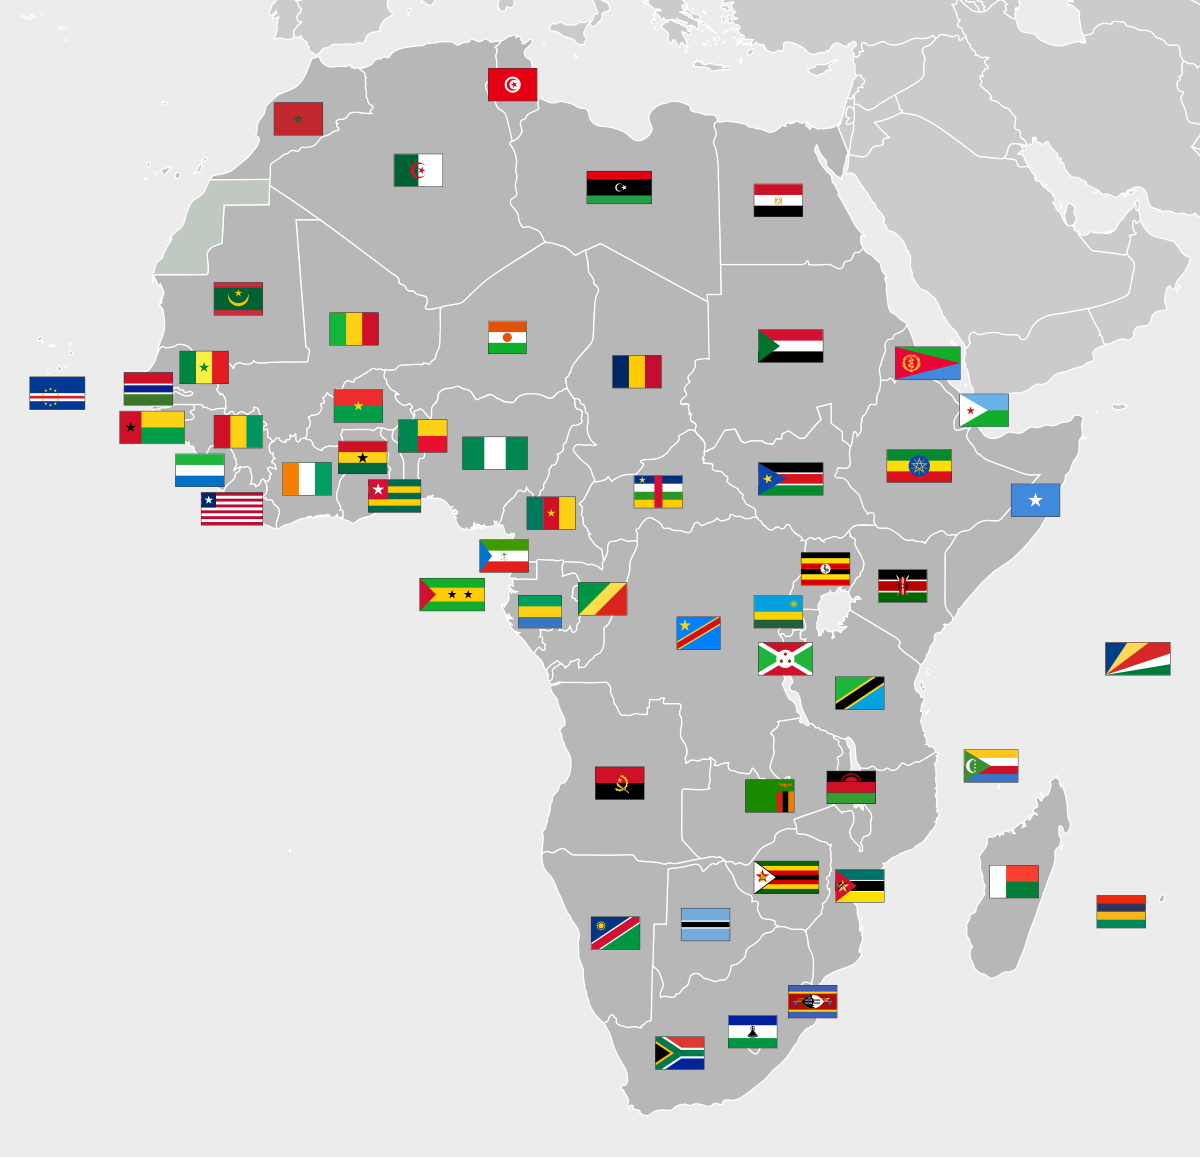

In [48]:
# map
# map of Africa flags from Wikipedia
map_img_overlay = folium.Map([2,22], zoom_start=3, tiles='CartoDB Positron')

# image to overlay on map
img_overlay = folium.raster_layers.ImageOverlay(name='flags of Africa', 
                                                image='data/flags_of_africa.png',
                                                # bounds - [[lat_min, lon_min], [lat_max, lon_max]]
                                                bounds=[[-38, -28], [40, 60]],
                                                opacity=0.5)
# add image to map
img_overlay.add_to(map_img_overlay)

# layer control to click layer on or off
folium.LayerControl().add_to(map_img_overlay)

# display map
map_img_overlay